In [4]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
from sklearn.metrics import pairwise_distances

# I made the figure and but the aspect ratio was not correct
# rescale the numbers to keep look the same
height, width = 8.25, 4.45
r = height / width / 2


def gaussian(x, y):
    return np.exp(-(x**2) - y**2 * 2 * r)


# irregular function with multiple local optima
def func(x, y):
    optima = np.array(
        [
            (-4, 4),
            (-4.5, 4.5),
            (-3, 2),
            (-2, 3),
            (-1, 2),
            (0.5, 1.5),
            (0.5, 1.5),
            (1.5, 3),
            (2, 3.5),
            (2.5, 4),
            (-4, -3),
            (-4, -3),
            (-2.5, -2),
            (4, -3),
            (3, -3),
            (4, -2),
            (2, -1),
            (0, -4),
            (0, -4),
        ]
    )
    optima = optima / [1, 2 / r]
    return np.sum([gaussian(x - x0, y - y0) for x0, y0 in optima], axis=0)


# Generate x and y values
x = np.linspace(-5, 5, 100)
y = np.linspace(-2.5, 2.5, 100) / r
X, Y = np.meshgrid(x, y)

# Calculate function values
Z = func(X, Y)

In [5]:
r = 1.0

idx = np.where(Z > 1.25)
X_good = X[idx]
Y_good = Y[idx]

points = np.array([X_good, Y_good]).T

np.random.shuffle(points)

connectivity_matrix = (pairwise_distances(points) < r).astype(int)
connectivity_matrix = connectivity_matrix - np.eye(connectivity_matrix.shape[0])
G = nx.from_numpy_array(connectivity_matrix)

neighbour_dict = nx.to_dict_of_lists(G)

# neighbour_dict = {k: neighbour_dict[k] for k in shuffled_keys}

forbidden_nodes = set()
selected_nodes = set()
selected_nodes_list = []
forbidden_nodes_lists = []
for node, neighbours in neighbour_dict.items():
    if node in forbidden_nodes:
        continue
    selected_nodes.add(node)
    selected_nodes_list.append(node)
    just_forbidden = list((set(neighbours) - selected_nodes) - forbidden_nodes)
    forbidden_nodes.update(neighbours)
    forbidden_nodes_lists.append(just_forbidden)  # needed for plotting

selected_nodes = list(selected_nodes)
selected_points = points[selected_nodes]

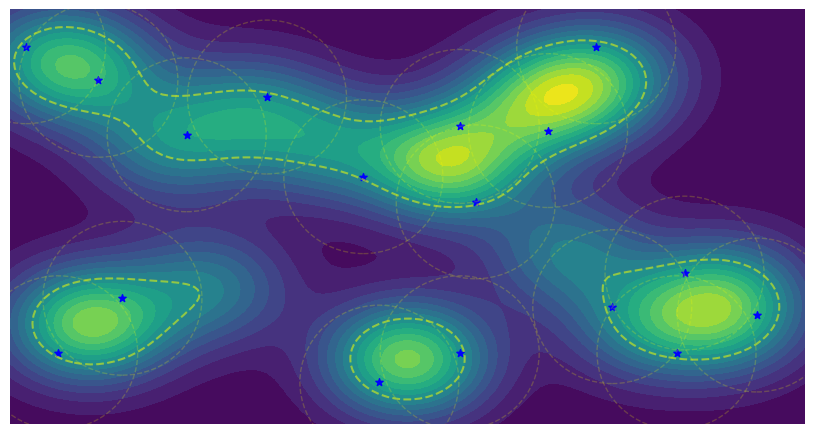

In [6]:
# Create filled contour plot

height, width = 8.25, 4.45
plt.figure(figsize=(height, width))

contour = plt.contourf(X, Y, Z, levels=20, cmap="viridis")
plt.contour(X, Y, Z, levels=[1.2], colors="yellow", linestyles="dashed", alpha=0.5)
plt.scatter(selected_points[:, 0], selected_points[:, 1], c="blue", s=30, marker="*", label="Selected Points")
# draw circles around selected points
for i, point in enumerate(selected_points):
    circle = plt.Circle((point[0], point[1]), r, color="yellow", fill=False, alpha=0.2, ls="--")
    plt.gca().add_artist(circle)

plt.axis("off")
plt.tight_layout()
plt.savefig("figures/graphic_abstract.png", dpi=300, bbox_inches="tight", pad_inches=0)
plt.savefig("figures/graphic_abstract.pdf", bbox_inches="tight", pad_inches=0)